In [2]:
import pandas as pd
import numpy as np
import re

pd.options.display.max_columns = None

### `Question-1:`

The dataset is based on NFTs. This is quite large. So, when you will read the dataset, you have to wait. The link of the dataset: https://tinyurl.com/2pfhncqw

Your task is to make a pivote table by using the columns "verification_status", "contract_type", "rarity_score" and "last_sale_price" to find out the total values.

In [3]:
# code here
df = pd.read_csv('../datasets/nfts_train - nfts_train.csv')
df

,Unnamed: 0,rarity_score,last_sale_date,last_sale_price,total_supply,creation_date,verification_status,n_of_traits,contract_type,seller_fees,platform_fees,openrarity_enabled,has_website,has_own_twitter,has_discord,has_medium,n_tweets_in_range,avg_likes,avg_replies,avg_retweets,min_likes,min_replies,min_retweets,max_likes,max_replies,max_retweets
0,0,2.000000,2022-11,1.266732,1,2022-04,verified,2,own,1000.0,250,False,False,True,True,False,31,187.967742,8.290323,60.935484,0,0,2,591,28,380
1,1,97.077216,2021-08,1.200357,8888,2021-07,verified,5,own,500.0,250,False,False,True,True,False,11,133.181818,13.454545,55.181818,0,0,7,402,47,239
2,2,139.453086,2022-08,3.180572,8888,2021-07,verified,5,own,500.0,250,False,False,True,True,False,11,133.181818,13.454545,55.181818,0,0,7,402,47,239
3,3,127.753445,2021-08,3.502910,8888,2021-07,verified,5,own,500.0,250,False,False,True,True,False,11,133.181818,13.454545,55.181818,0,0,7,402,47,239
4,4,112.315719,2022-09,4.009567,8888,2021-07,verified,5,own,500.0,250,False,False,True,True,False,11,133.181818,13.454545,55.181818,0,0,7,402,47,239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309905,309905,128.268842,2022-08,0.001571,9000,2022-02,approved,8,default,900.0,250,False,False,True,False,False,26,8.153846,0.884615,1.153846,0,0,0,30,6,12
309906,309906,152.040769,2022-08,0.001661,9000,2022-02,approved,8,default,900.0,250,False,False,True,False,False,26,8.153846,0.884615,1.153846,0,0,0,30,6,12
309907,309907,178.734807,2022-08,0.008480,9000,2022-02,approved,8,default,900.0,250,False,False,True,False,False,26,8.153846,0.884615,1.153846,0,0,0,30,6,12
309908,309908,130.974464,2022-08,0.004236,9000,2022-02,approved,8,default,900.0,250,False,False,True,False,False,26,8.153846,0.884615,1.153846,0,0,0,30,6,12


In [4]:
df.pivot_table(index='verification_status',columns='contract_type', values=['rarity_score','last_sale_price'],aggfunc='sum')

last_sale_price                 rarity_score              
contract_type               default            own       default           own
verification_status                                                           
approved                 658.931935    1684.819488  3.973082e+08  3.929607e+06
verified                 370.304092  667394.862655  2.475007e+06  4.165654e+07

### `Question-2:`

You are given a dataset about the cars' price and miles driven of different cars throughout the different years. The link of the dataset: https://tinyurl.com/2r24n45l. Your tasks are
- make a pivot table of the brands (the required brands are given below) from the "Year" 2018 to the year 2022 in which the "Price" is shown as average values and "Miles" are in median values. In this pivote table, every row represents a particular brand and each column represents either average "Price" of a partucular year or median values of "Miles" of a particular year.
- At the end plot a kde chart for the "Price" and "Miles" by using your pivot table.

There are some challenges to solve this task:
- There is no column that is represented to the brand name of the car. You have to find out on your own.
- Some values of "Years" column are misleading. You have to reset this column too that every value should tell a valid meaning.

In [5]:
df =pd.read_csv('https://tinyurl.com/2r24n45l')

In [6]:
df.head()

,Name,Year,Miles,Price
0,Chevrolet Trax,2018,41946,16990
1,GMC Terrain,2020,45328,23990
2,Jeep Wrangler,2012,81068,21590
3,Jeep Renegade,2019,35372,21590
4,BMW X,20173,68992,22990


In [7]:
df['Brand']=df['Name'].str.split().str.get(0)

In [8]:
df

,Name,Year,Miles,Price,Brand
0,Chevrolet Trax,2018,41946,16990,Chevrolet
1,GMC Terrain,2020,45328,23990,GMC
2,Jeep Wrangler,2012,81068,21590,Jeep
3,Jeep Renegade,2019,35372,21590,Jeep
4,BMW X,20173,68992,22990,BMW
...,...,...,...,...,...
21995,Honda Accord,2014,98085,17590,Honda
21996,Dodge Charger,2016,62616,23990,Dodge
21997,Ford Taurus,2013,50345,16990,Ford
21998,Toyota Corolla Hatchback,2020,27945,23990,Toyota


In [ ]:
import re 
df['Year'] = df['Year'].apply(lambda x:int(re.findall(r"\d{4}", str(x))[0]))


In [12]:
pt =df.query('Year>=2018  and Year<=2022').pivot_table(index='Brand',columns='Year',values=['Price','Miles'],aggfunc={'Price':'mean','Miles':'median'},fill_value=0)


<Axes: ylabel='Density'>

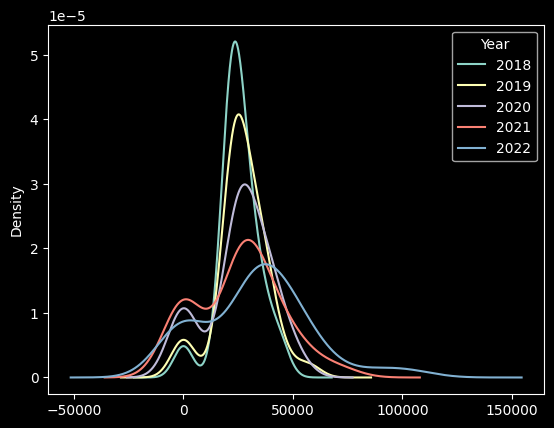

In [13]:
pt.Price.plot(kind='kde')

<Axes: ylabel='Density'>

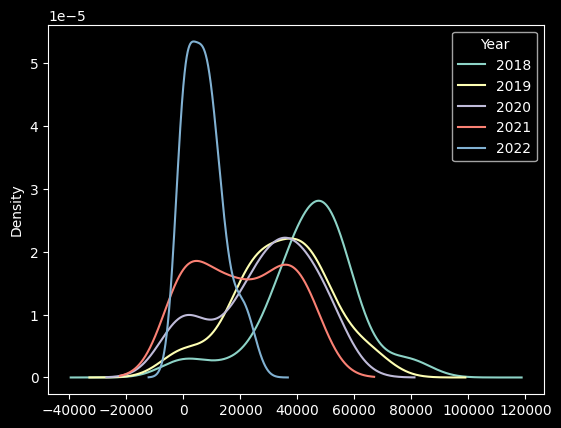

In [14]:
pt.Miles.plot(kind='kde')


### `Question-3:`

You are given a dataset of **Daily Power Generation in India** of regional wise of all Power Stations. Link of the dataset: https://tinyurl.com/2nq6kugt

Task
- In this dataset, there are many columns. Two of them are `Actual(MU)` and `Excess(+) / Shortfall (-)`. `Actual(MU)` represents the actual power generation. `Excess(+) / Shortfall (-)` tells is that generated power is excess or shortfall for that particular day of a power station. You have to find out what should be the actual power generation required for that day by the power stations that there would not be any excess or shorfall power. For the result, make a new column.
- Find out the month of the day and store it as a new column.
- Find out top 10 frequently appeared power stations in this dataframe.
- Next create a pivot table of which every row represents a power station and every column represents a month in a order. Like January, February, March...
- It is hard to get inside if you look through the only pivot table. So plot the pivot table.

In [15]:
df = pd.read_csv('https://tinyurl.com/2nq6kugt')

In [16]:
df['Required'] = df['Actual(MU)'] - df['Excess(+) / Shortfall (-)']

In [17]:
df

,Dates,Power Station,Monitored Cap.(MW),Total Cap. Under Maintenace (MW),Planned Maintanence (MW),Forced Maintanence(MW),Other Reasons (MW),Programme or Expected(MU),Actual(MU),Excess(+) / Shortfall (-),Deviation,Required
0,2017-09-01,Delhi,2235.4,135.00,0.00,135.0,0,13,18,5.00,0.0,13.00
1,2017-09-01,Haryana,2720.0,2470.00,0.00,2470.0,0,28,7,-21.80,0.0,28.80
2,2017-09-01,Himachal Pradesh,3378.0,379.00,0.00,231.0,0,40,46,5.63,0.0,40.37
3,2017-09-01,Jammu and Kashmir,1285.0,150.00,0.00,0.0,0,14,23,9.43,0.0,13.57
4,2017-09-01,Punjab,3826.3,2697.65,77.65,2620.0,0,39,17,-21.69,0.0,38.69
...,...,...,...,...,...,...,...,...,...,...,...,...
345268,2022-04-13,Tripura,137.0,32.00,0.00,0.0,32,0,1,0.29,0.0,0.71
345269,2022-04-13,NEEPCO.,2027.0,963.50,313.50,650.0,0,0,12,-1.59,0.0,13.59
345270,2022-04-13,NHPC,105.0,35.00,0.00,35.0,0,0,0,-0.72,0.0,0.72
345271,2022-04-13,NTPC Ltd.,750.0,250.00,0.00,250.0,0,0,11,4.45,0.0,6.55


In [18]:
df['Month']=pd.to_datetime(df['Dates']).dt.month_name()

In [19]:
top_10 = df['Power Station'].value_counts().sort_values(ascending=False).head(10)

In [20]:
df

,Dates,Power Station,Monitored Cap.(MW),Total Cap. Under Maintenace (MW),Planned Maintanence (MW),Forced Maintanence(MW),Other Reasons (MW),Programme or Expected(MU),Actual(MU),Excess(+) / Shortfall (-),Deviation,Required,Month
0,2017-09-01,Delhi,2235.4,135.00,0.00,135.0,0,13,18,5.00,0.0,13.00,September
1,2017-09-01,Haryana,2720.0,2470.00,0.00,2470.0,0,28,7,-21.80,0.0,28.80,September
2,2017-09-01,Himachal Pradesh,3378.0,379.00,0.00,231.0,0,40,46,5.63,0.0,40.37,September
3,2017-09-01,Jammu and Kashmir,1285.0,150.00,0.00,0.0,0,14,23,9.43,0.0,13.57,September
4,2017-09-01,Punjab,3826.3,2697.65,77.65,2620.0,0,39,17,-21.69,0.0,38.69,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...
345268,2022-04-13,Tripura,137.0,32.00,0.00,0.0,32,0,1,0.29,0.0,0.71,April
345269,2022-04-13,NEEPCO.,2027.0,963.50,313.50,650.0,0,0,12,-1.59,0.0,13.59,April
345270,2022-04-13,NHPC,105.0,35.00,0.00,35.0,0,0,0,-0.72,0.0,0.72,April
345271,2022-04-13,NTPC Ltd.,750.0,250.00,0.00,250.0,0,0,11,4.45,0.0,6.55,April


In [23]:
pt = df[df['Power Station'].isin(top_10)].pivot_table(index='Month',columns='Power Station',values='Required',aggfunc='sum')


In [25]:
pt.plot(kind = 'bar')

TypeError: no numeric data to plot

###`Q-4` You are given a file `question-answer.csv`. Your task is to make a dataframe from it with two columns - `question` and `answers`.

* Questions in the file start from `Q<number>`; E.g.  `Q1` denotes question no. `1`
* Answers starts from `Ans<number>`; Eg. `Ans1` denotes answer of question no `1`
* MAke sure you look at columns name carefully

CSV File - "https://drive.google.com/file/d/10rmV3XrVtzpDTtYZF3UtCdcU0ajBJjGY/view?usp=share_link"

In [26]:
df = pd.read_csv('../datasets/question-answer.csv')

In [27]:
df


,Unnamed: 0,2
0,0,Q1-What is Data Science?
1,1,"Ans1-Data Science combines statistics, maths, ..."
2,2,Q2-2. How is logistic regression done?
3,3,Ans2-Logistic regression measures the relation...
4,4,Q3-How do you build a random forest model?
5,5,Ans3-A random forest is built up of a number o...
6,6,Q4-How can you avoid overfitting your model?
7,7,Ans4-Overfitting refers to a model that is onl...
8,8,Q5-You are given a data set consisting of vari...
9,9,Ans5-The following are ways to handle missing ...


In [28]:
question = df['2'][df['2'].str.startswith('Q')].str.split('-').str.get(1).reset_index()

In [29]:
answer = df['2'][df['2'].str.startswith('A')].str.split('-').str.get(1).reset_index()
answer

,index,2
0,1,"Data Science combines statistics, maths, speci..."
1,3,Logistic regression measures the relationship ...
2,5,A random forest is built up of a number of dec...
3,7,Overfitting refers to a model that is only set...
4,9,The following are ways to handle missing data ...
5,11,Bag of Words is a representation of text that ...
6,13,Machine learning classification algorithms pre...
7,15,A time series is a set of observations ordered...
8,17,The principle behind causal forecasting is tha...
9,19,(INNER) JOIN: Returns records that have matchi...


In [30]:
result =question.merge(answer,left_index=True,right_index=True).drop(columns=['index_x','index_y']).rename(columns={'2_x':'Question','2_y':'Answer'})

###`Q-5`: Print Question and answer of those questions which does not contains any question mark (`?`).


In [31]:
# code here
result[~result['Question'].str.contains('\?',regex=True)]

,Question,Answer


###`Q 6-10` LOG and EMPLOYEE
6. Show `activity` details month wise. Show count for each `activity`
7. Find employee who did most `activity` in January month.
8. Employee who have worked most no of times on Weekends.
9. Which activity is logged most on buisness days.
10. Week Days wise activity table.
```
log_file = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vT-OMrmmNdOTM-B5f5F1EpCutMVG230UZiLvqlsg0NIKUKR3yrqiI2r1pEX-LvSEk-3WwySPYtvbBC-/pub?gid=1937029224&single=true&output=csv")
employee = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQ5AuFqRjSZVBKm5zyDxquX6utubq1DJKkYDI70vjeidAnyAu70KMSYpMYzeVSNVTeUIJBpfF6jU5E6/pub?gid=798824749&single=true&output=csv")

```

Note(for common field):- Employee file has `EMPLOYEE_ID` and LOG file has `emp_id`

In [32]:
log_file = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vT-OMrmmNdOTM-B5f5F1EpCutMVG230UZiLvqlsg0NIKUKR3yrqiI2r1pEX-LvSEk-3WwySPYtvbBC-/pub?gid=1937029224&single=true&output=csv")
employee = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQ5AuFqRjSZVBKm5zyDxquX6utubq1DJKkYDI70vjeidAnyAu70KMSYpMYzeVSNVTeUIJBpfF6jU5E6/pub?gid=798824749&single=true&output=csv")


In [33]:
log_file['dt']=pd.to_datetime(log_file['dt'])

In [34]:
log_file['Month']=log_file['dt'].dt.month_name()

In [35]:
log_file.pivot_table(index='Month',columns='activity',aggfunc='count')['Log_ID']

activity,Checking,Cleaning,Inspection,Repair
Month,,,,
April,5,11,9,5
August,8,10,9,4
December,6,7,12,6
February,7,7,4,10
January,7,10,9,5
July,6,6,14,5
June,5,7,8,10
March,8,6,5,12
May,5,8,7,11


In [36]:
log_file.query('Month == "January"')['emp_id'].value_counts().head(1)

emp_id
122    3
Name: count, dtype: int64

In [37]:
log_file[log_file['dt'].dt.dayofweek>4]['emp_id'].value_counts().head(1)

emp_id
144    6
Name: count, dtype: int64

In [38]:
log_file[log_file['dt'].dt.dayofweek<=4]['activity'].value_counts().head(1)


activity
Inspection    77
Name: count, dtype: int64

In [39]:
log_file['day'] = log_file['dt'].dt.day_name()
log_file

,Log_ID,dt,dept,emp_id,activity,eqpt,Month,day
0,1000,2022-01-07,Dept6,115,Cleaning,UPS,January,Friday
1,1001,2022-01-08,Dept4,105,Cleaning,Generator,January,Saturday
2,1002,2022-01-09,Dept3,112,Inspection,CPU,January,Sunday
3,1003,2022-01-10,Dept4,120,Inspection,UPS,January,Monday
4,1004,2022-01-11,Dept3,138,Checking,Battery,January,Tuesday
...,...,...,...,...,...,...,...,...
360,1360,2023-01-02,Dept2,122,Repair,AC,January,Monday
361,1361,2023-01-03,Dept4,116,Checking,Server,January,Tuesday
362,1362,2023-01-04,Dept4,110,Checking,CPU,January,Wednesday
363,1363,2023-01-05,Dept4,102,Inspection,AC,January,Thursday


In [40]:
log_file.pivot_table(index='day',columns='activity',aggfunc='count')['Log_ID']


activity,Checking,Cleaning,Inspection,Repair
day,,,,
Friday,8,16,20,9
Monday,10,14,13,15
Saturday,18,11,8,15
Sunday,13,13,15,11
Thursday,8,16,16,12
Tuesday,15,9,15,13
Wednesday,14,9,13,16


### `Q-11`:

1. There are missing value in first name of employee. Fill it using email and last name field.

> E.g- `email` -> JMURMAN and `last_name` -> 'Urman' -> so make it's first name as 'JM', Sort of (Email- lastname).

> Email is constructed from initials of first name concate with lastname. Your Task is to fill first name initials in missing data.

2. You can see email field don't have any domain name. Change this to full email addreess with domain as 'campusx.com'.
E.g- Email field -> `JMURMAN`  result -> `JMURMAN@CAMPUSX.COM`

3. Show Full Name of all the employees whose name starts with 'A' and has done any of these activity ['Incpection', 'Cleaning', 'Checking]

In [41]:
fill_values =employee[employee['FIRST_NAME'].isnull()].apply(lambda x:x['EMAIL'][0]+x['LAST_NAME'][0],axis=1)

In [42]:
employee['FIRST_NAME'] =employee['FIRST_NAME'].fillna(fill_values)

In [43]:
employee['EMAIL'] = employee['EMAIL']+'campux.com'

In [44]:
temp_df = log_file[log_file['activity'].isin(['Cleaning','Inspection','Checking'])]

In [45]:
merge = temp_df.merge(employee,right_on='EMPLOYEE_ID',left_on='emp_id',how='inner')

In [46]:
merge

,Log_ID,dt,dept,emp_id,activity,eqpt,Month,day,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL
0,1000,2022-01-07,Dept6,115,Cleaning,UPS,January,Friday,115,Alexander,Khoo,AKHOOcampux.com
1,1001,2022-01-08,Dept4,105,Cleaning,Generator,January,Saturday,105,David,Austin,DAUSTINcampux.com
2,1002,2022-01-09,Dept3,112,Inspection,CPU,January,Sunday,112,JU,Urman,JMURMANcampux.com
3,1003,2022-01-10,Dept4,120,Inspection,UPS,January,Monday,120,Matthew,Weiss,MWEISScampux.com
4,1004,2022-01-11,Dept3,138,Checking,Battery,January,Tuesday,138,Stephen,Stiles,SSTILEScampux.com
...,...,...,...,...,...,...,...,...,...,...,...,...
217,1359,2023-01-01,Dept3,122,Cleaning,Pump,January,Sunday,122,Payam,Kaufling,PKAUFLINGcampux.com
218,1361,2023-01-03,Dept4,116,Checking,Server,January,Tuesday,116,Shelli,Baida,SBAIDAcampux.com
219,1362,2023-01-04,Dept4,110,Checking,CPU,January,Wednesday,110,John,Chen,JCHENcampux.com
220,1363,2023-01-05,Dept4,102,Inspection,AC,January,Thursday,102,Lex,De Haan,LDEHAANcampux.com


In [47]:
x =merge[merge['FIRST_NAME'].str.startswith('A')]

In [48]:
(x['FIRST_NAME']+ ' '+ x['LAST_NAME']).unique()

array(['Alexander Khoo', 'Alexander Hunold', 'AF Fripp'], dtype=object)

In [49]:
employee

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL
0,100,Steven,King,SKINGcampux.com
1,101,Neena,Kochhar,NKOCHHARcampux.com
2,102,Lex,De Haan,LDEHAANcampux.com
3,103,Alexander,Hunold,AHUNOLDcampux.com
4,104,Bruce,Ernst,BERNSTcampux.com
5,105,David,Austin,DAUSTINcampux.com
6,106,Valli,Pataballa,VPATABALcampux.com
7,107,Diana,Lorentz,DLORENTZcampux.com
8,108,Nancy,Greenberg,NGREENBEcampux.com
9,109,Daniel,Faviet,DFAVIETcampux.com
